In [1]:
import pandas as pd
import random
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

from scipy.signal import find_peaks

# Set parameters for a larger dataset

In [2]:
duration_hours = 24  # 1 day (24 hours)
sampling_rate_hz = 100  # 100Hz
num_samples = duration_hours * 60 * 60 * sampling_rate_hz

In [6]:
def generate_data(num_samples):
    time_stamps = []
    cpu_temps = []
    cpu_usage = []
    cpu_load = []
    memory_usage = []
    battery_level = []
    cpu_power = []

    # Generate synthetic data
    for i in range(num_samples):
        time_stamps.append(datetime.datetime.now() + datetime.timedelta(seconds=i))
        cpu_temps.append(random.uniform(30, 100))  # CPU temp in °C
        cpu_usage.append(random.uniform(0, 100))  # CPU usage in percentage
        cpu_load.append(random.uniform(0, 2))  # CPU load between 0 and 2
        memory_usage.append(random.uniform(10, 90))  # Memory usage percentage
        battery_level.append(random.uniform(10, 100))  # Battery level in percentage
        cpu_power.append(random.uniform(10, 50))  # CPU power usage in watts

    # Create a DataFrame
    data = {
        'Time': time_stamps,
        'Cpu_Temperature': cpu_temps,
        'Cpu_Usage': cpu_usage,
        'Cpu_Load': cpu_load,
        'Memory_Usage': memory_usage,
        'Battery_Level': battery_level,
        'Cpu_Power': cpu_power
    }

    df = pd.DataFrame(data)
    return df

# Generate the data and handle potential I/O issues
try:
    df = generate_data(num_samples)
    df.to_csv('hardware_monitor_data_with_anomalies_large.csv', index=False)
    print("Data generated and saved successfully.")
except Exception as e:
    print(f"Error generating or saving data: {e}")

# Step 2: Anomaly Detection using Isolation Forest
# Read the data from the CSV file
try:
    df = pd.read_csv('hardware_monitor_data_with_anomalies_large.csv')
except FileNotFoundError:
    print("CSV file not found. Make sure the file path is correct.")
except Exception as e:
    print(f"Error reading the CSV file: {e}")

# Columns to check for anomalies
columns_to_check = ['Cpu_Temperature', 'Cpu_Usage', 'Cpu_Load', 'Memory_Usage', 'Battery_Level', 'Cpu_Power']

# Handle anomaly detection and potential issues with IsolationForest
try:
    anomaly_detector = IsolationForest(contamination=0.01)  # Adjust contamination based on expected anomaly rate
    df['Anomaly'] = anomaly_detector.fit_predict(df[columns_to_check])

    # Anomalies will be marked as -1, normal points as 1
    df['Anomaly'] = df['Anomaly'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')
except Exception as e:
    print(f"Error during anomaly detection: {e}")

KeyboardInterrupt: 

#Load the data


In [ ]:
chunk_size = 100000  # Adjust depending on your system's memory
chunks = []

for chunk in pd.read_csv('hardware_monitor_data_with_anomalies_large.csv', chunksize=chunk_size):
    chunks.append(chunk)

# Concatenate all chunks into a single dataframe
df = pd.concat(chunks, axis=0)

In [5]:
# Define thresholds for each feature to simulate anomaly conditions
thresholds = {
    'Cpu_Temperature': 90,  # Anything above 90°C can be considered an anomaly
    'Cpu_Usage': 85,  # CPU usage greater than 85% could be an anomaly
    'Cpu_Load': 1.8,  # Load greater than 1.8 could indicate a high load anomaly
    'Memory_Usage': 80,  # Memory usage greater than 80% could indicate an anomaly
    'Battery_Level': 10,  # Battery level below 10% is considered an anomaly
    'Cpu_Power': 40  # CPU power usage greater than 40W could be an anomaly
}

# Add anomaly columns based on the thresholds
for feature, threshold in thresholds.items():
    df[f'Anomaly_{feature}'] = df[feature] > threshold

NameError: name 'df' is not defined

In [ ]:
time_stamps = [datetime.datetime.now() + datetime.timedelta(seconds=i) for i in range(len(df))]

# Add the 'Time' column to the DataFrame
df['Time'] = time_stamps

# Now, check again if 'Time' is present
print(df.columns)

Index(['Cpu_Temperature', 'Cpu_Usage', 'Cpu_Load', 'Memory_Usage',
       'Battery_Level', 'Cpu_Power', 'Anomaly_Cpu_Temperature',
       'Anomaly_Cpu_Usage', 'Anomaly_Cpu_Load', 'Anomaly_Memory_Usage',
       'Anomaly_Battery_Level', 'Anomaly_Cpu_Power', 'Time'],
      dtype='object')


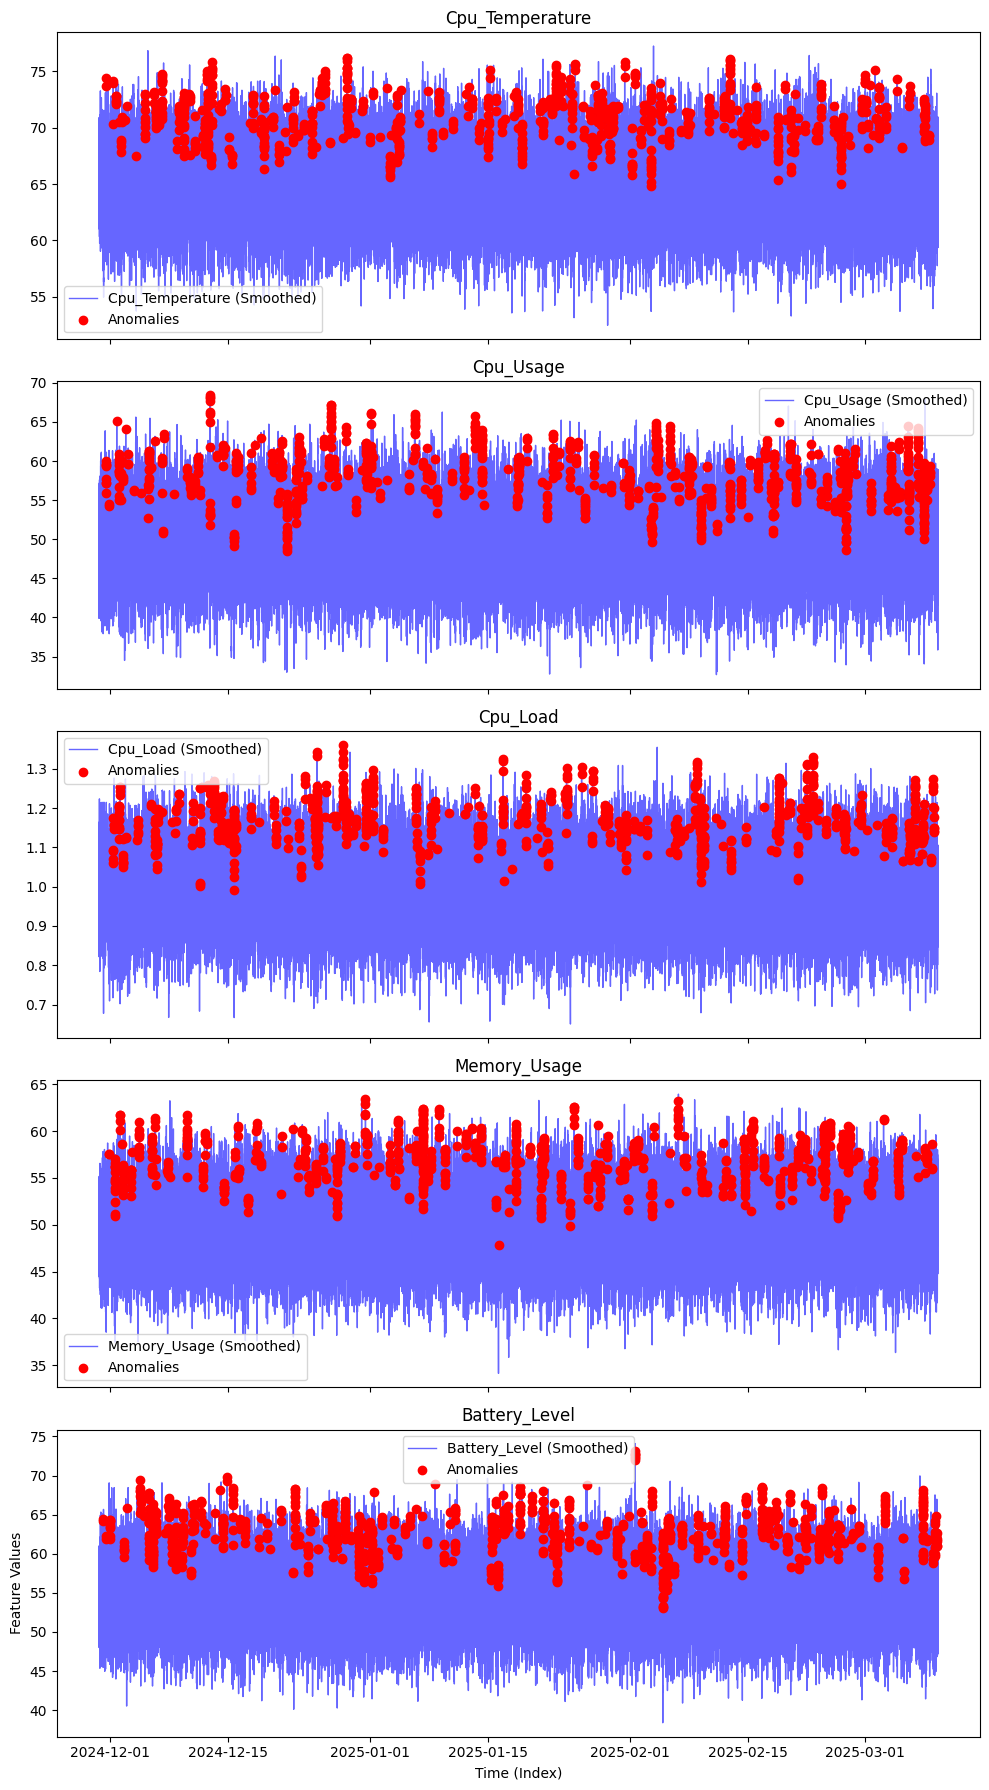

In [ ]:
df_subsampled = df_clean.iloc[::10]  # Downsample by taking every 10th row

# Apply a rolling mean to smooth the data for numerical columns
# Exclude 'Time' column from rolling mean operation
df_subsampled_smooth = df_subsampled.drop(columns=['Time']).rolling(window=50).mean()  # Larger window for better smoothing

# Set up the figure with subplots for each feature
fig, axs = plt.subplots(5, 1, figsize=(10, 18), sharex=True)

# Helper function to plot anomalies and peaks
def plot_anomalies(ax, df, feature, color='r'):
    # Calculate the rolling mean (smoothed data)
    rolling_mean = df[feature].rolling(window=50).mean()  # Adjust window size for smoothing

    # Define a higher threshold for anomaly detection (3 standard deviations above the mean)
    threshold = rolling_mean + 3 * rolling_mean.std()  # Anomaly threshold: 3 standard deviations above the mean

    # Identify anomalies (where the value exceeds the threshold)
    anomalies = df[feature] > threshold

    # Plot the smoothed data as a line (with reduced alpha to decrease density)
    ax.plot(df.index, df[feature], label=f'{feature} (Smoothed)', color='b', alpha=0.6, linewidth=1)

    # Mark anomalies (points where the value exceeds the threshold) as red dots
    ax.scatter(df.index[anomalies], df[feature][anomalies], color=color, label='Anomalies', zorder=5)

    # Set the title and labels for the plot
    ax.set_title(f'{feature}')
    ax.legend()

# Plot for CPU Temperature
plot_anomalies(axs[0], df_subsampled_smooth, 'Cpu_Temperature')

# Plot for CPU Usage
plot_anomalies(axs[1], df_subsampled_smooth, 'Cpu_Usage')

# Plot for CPU Load
plot_anomalies(axs[2], df_subsampled_smooth, 'Cpu_Load')

# Plot for Memory Usage
plot_anomalies(axs[3], df_subsampled_smooth, 'Memory_Usage')

# Plot for Battery Level
plot_anomalies(axs[4], df_subsampled_smooth, 'Battery_Level')

# Formatting and showing the plot
plt.xlabel('Time (Index)')
plt.ylabel('Feature Values')
plt.tight_layout()
plt.show()
